**RANDOM FOREST REGRESSOR**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Done")

Done


In [ ]:
df = pd.read_csv('/content/dataset_file.csv')

df.head(10)

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333
5,22.9,30.6,17.4,51.0,0.0,6.9,3.5,3.5,200.645833
6,22.3,30.1,15.7,43.0,0.0,6.9,2.8,5.4,285.225000
7,21.8,30.6,14.8,41.0,0.0,6.9,1.9,5.4,334.341176
8,21.6,30.6,14.2,43.0,0.0,6.9,3.1,7.6,276.908333
9,21.6,29.6,16.4,58.0,0.0,6.9,2.2,3.5,108.000000


In [ ]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(forest.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9276281157785282


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(forest.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.4062783059131314


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(forest, X, y, cv = 3)

In [ ]:
score.mean()

0.2878676883316567

In [ ]:
pred = forest.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


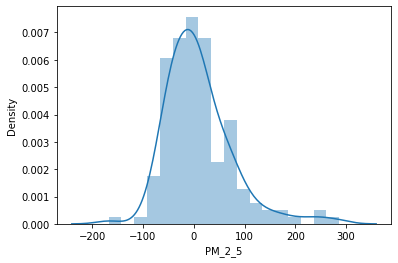

In [ ]:
sns.distplot(y_test - pred)

HYPERPARAMETER TUNING

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10]
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(forest, params, scoring='neg_mean_squared_error', 
                            cv=5, n_iter=100, random_state=43, n_jobs=-1)
search.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
search.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 1000}

In [ ]:
search.best_score_

-4005.2070251735176

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


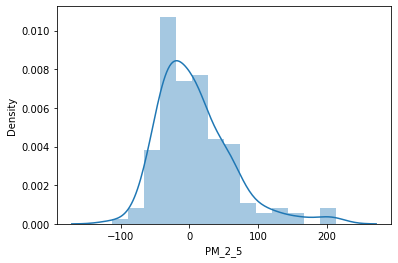

In [ ]:
pred = search.predict(X_test)
sns.distplot(y_test-pred)

In [ ]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 39.81513961661425
Mean Sq Error: 2950.8232068658235
Root Mean Error: 54.32148016085187


In [ ]:
import pickle
pickle.dump(search, open('random_forest_regression_model.pkl', 'wb'))